# Deliverable 2: Scrape and Analyze Mars Weather Data

In [87]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [88]:
# Open a Chrome window using Splinter
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.

In [89]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [90]:
# Get the page source (HTML)
html = browser.html
# Create a Beautiful Soup object
soup = BeautifulSoup(html,'html.parser')

In [91]:
# Find the table
table = soup.find('table')

# Extract all rows of data
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [92]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
# Extract headers (the column names)
headers = []
for header in table.find_all('th'):
    headers.append(header.text.strip())

# Extract rows of data
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    data_row = {headers[i]: cells[i].text.strip() for i in range(len(cells))}
    rows.append(data_row)

In [93]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows)

In [94]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.

In [95]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [96]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['id'] = df['id'].astype('object')
df['sol'] = df['sol'].astype('int32')
df['ls'] = df['ls'].astype('int32')
df['month'] = df['month'].astype('int32')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

In [97]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [98]:
# 1. How many months are there on Mars?
unique_months = df['month'].unique()

# Count the number of unique months
num_months = len(unique_months)

print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [99]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols_count = df['sol'].nunique()

# Print results
print(f"The dataset covers {unique_sols_count} Martian days.")

The dataset covers 1867 Martian days.


In [100]:
# 3. What is the average minimum temperature by month?
ave_min_temp = df.groupby('month')['min_temp'].mean()

# Print the results
print("Average minimum temperature by month:")
print(ave_min_temp)

Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


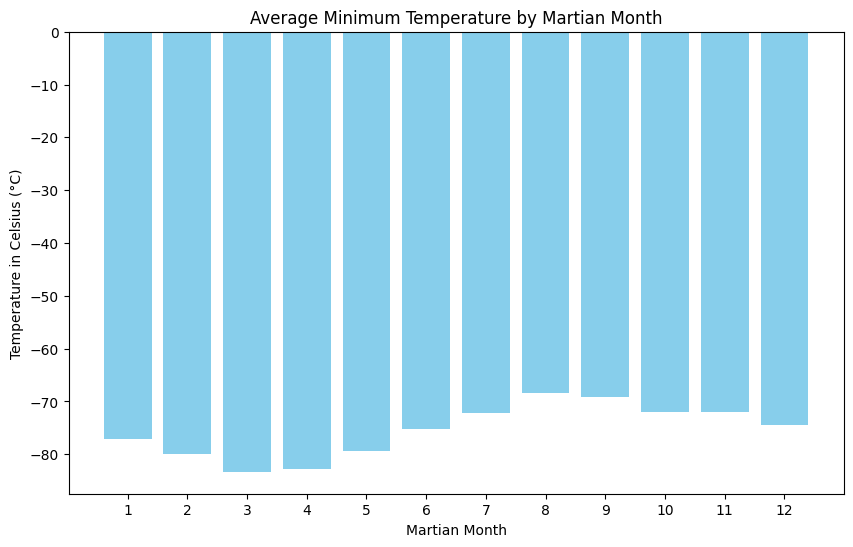

In [101]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
plt.bar(ave_min_temp.index, ave_min_temp, color='skyblue')
plt.xlabel('Martian Month')
plt.ylabel('Temperature in Celsius (°C)')
plt.title('Average Minimum Temperature by Martian Month')
plt.xticks(ave_min_temp.index)
plt.show()

In [102]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp = ave_min_temp.sort_values()

# Coldest month (the first entry after sorting)
coldest_month = sorted_temp.idxmin()
coldest_temp = sorted_temp.min().round(2)

# Hottest month (the last entry after sorting)
hottest_month = sorted_temp.idxmax()
hottest_temp = sorted_temp.max().round(2)

# Print the coldest and hottest months
print(f"The coldest month is Month {coldest_month} with an average minimum temperature of {coldest_temp}°C.")
print(f"The hottest month is Month {hottest_month} with an average minimum temperature of {hottest_temp}°C.")


The coldest month is Month 3 with an average minimum temperature of -83.31°C.
The hottest month is Month 8 with an average minimum temperature of -68.38°C.


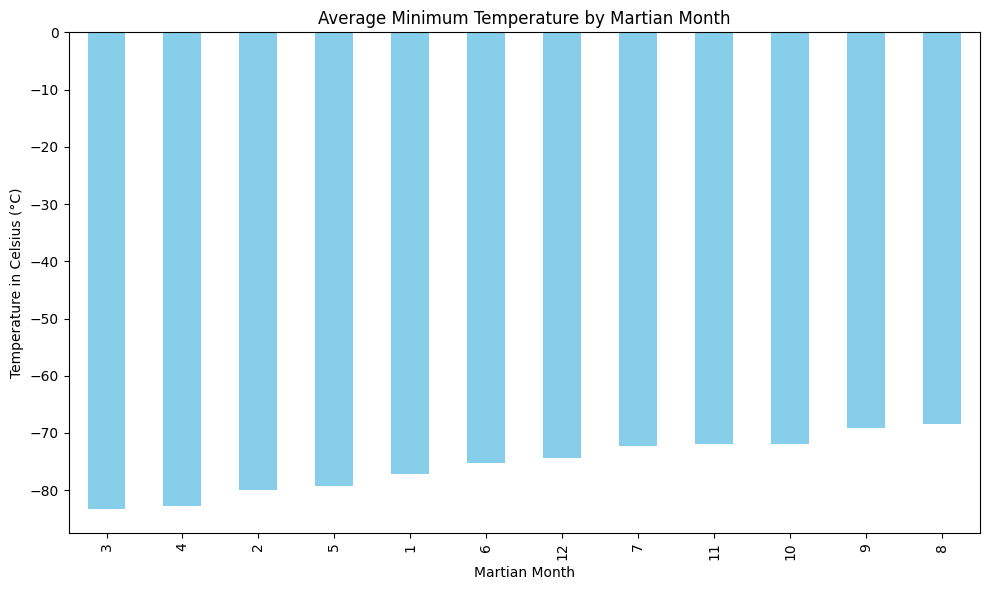

In [103]:
# Plotting sorted bar chart
plt.figure(figsize=(10, 6))
ax = sorted_temp.plot(kind='bar', color='skyblue')
ax.set_title('Average Minimum Temperature by Martian Month')
ax.set_xlabel('Martian Month')
ax.set_ylabel('Temperature in Celsius (°C)')
plt.tight_layout()
plt.show()

In [104]:
# 4. What is the average pressure by month?
ave_press = df.groupby('month')['pressure'].mean()

# Print the results
print("Average pressure by month:")
print(ave_press)

Average pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


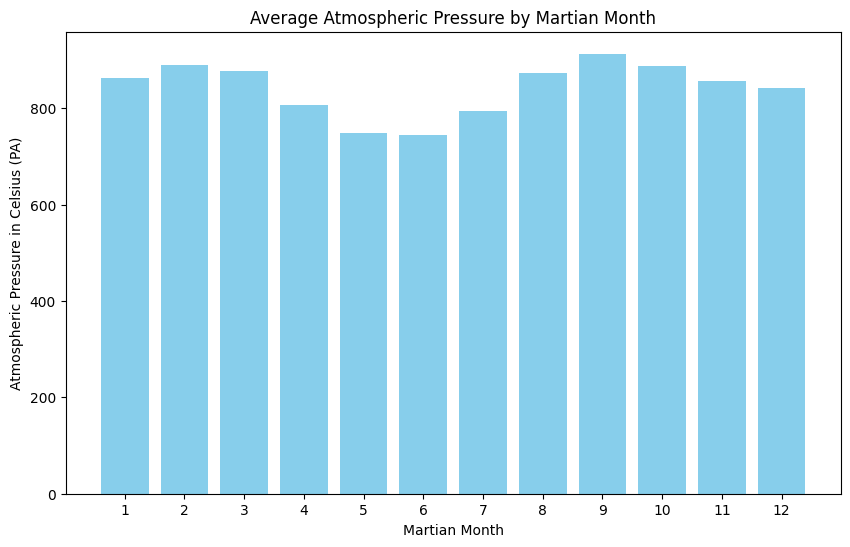

In [105]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(ave_press.index, ave_press, color='skyblue')
plt.xlabel('Martian Month')
plt.ylabel('Atmospheric Pressure in Celsius (PA)')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xticks(ave_press.index)
plt.show()

In [106]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_press = ave_press.sort_values()

# Find the lowest and highest pressure months
highest_press_month = sorted_press.idxmax()
highest_press = sorted_press.max().round(2)
lowest_press_month = sorted_press.idxmin()
lowest_press = sorted_press.min().round(2)

# Print the coldest and hottest months
print(f"The highest pressure month is Month {highest_press_month} with an average atmospheric pressure of {highest_press } PA.")
print(f"The lowest pressure month is Month {lowest_press_month} with an average atmospheric pressure of {lowest_press} PA.")

The highest pressure month is Month 9 with an average atmospheric pressure of 913.31 PA.
The lowest pressure month is Month 6 with an average atmospheric pressure of 745.05 PA.


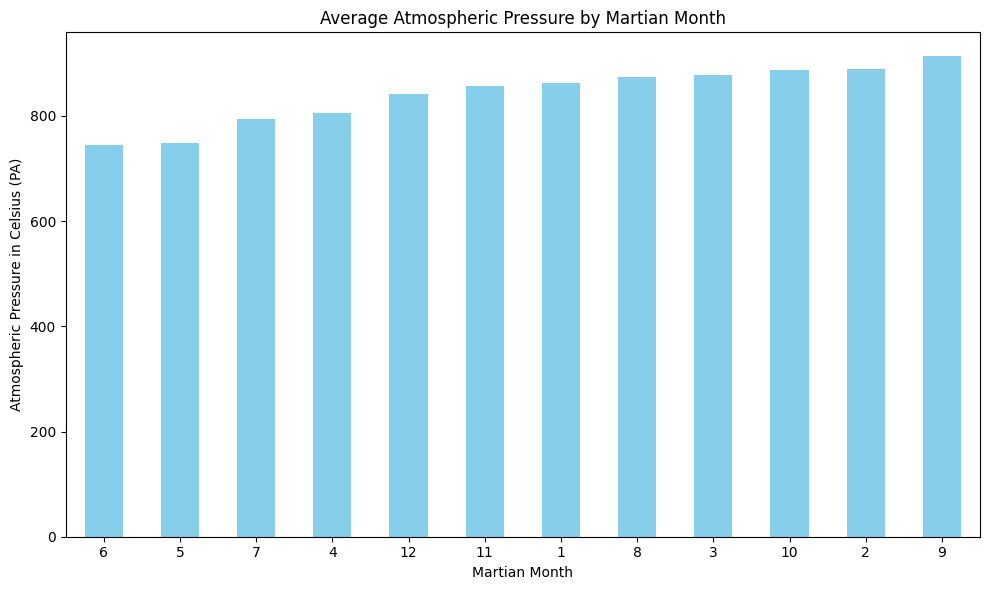

In [107]:
# Plotting sorted bar chart
plt.figure(figsize=(10, 6))
ax = sorted_press.plot(kind='bar', color='skyblue')
ax.set_title('Average Atmospheric Pressure by Martian Month')
ax.set_xlabel('Martian Month')
ax.set_ylabel('Atmospheric Pressure in Celsius (PA)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

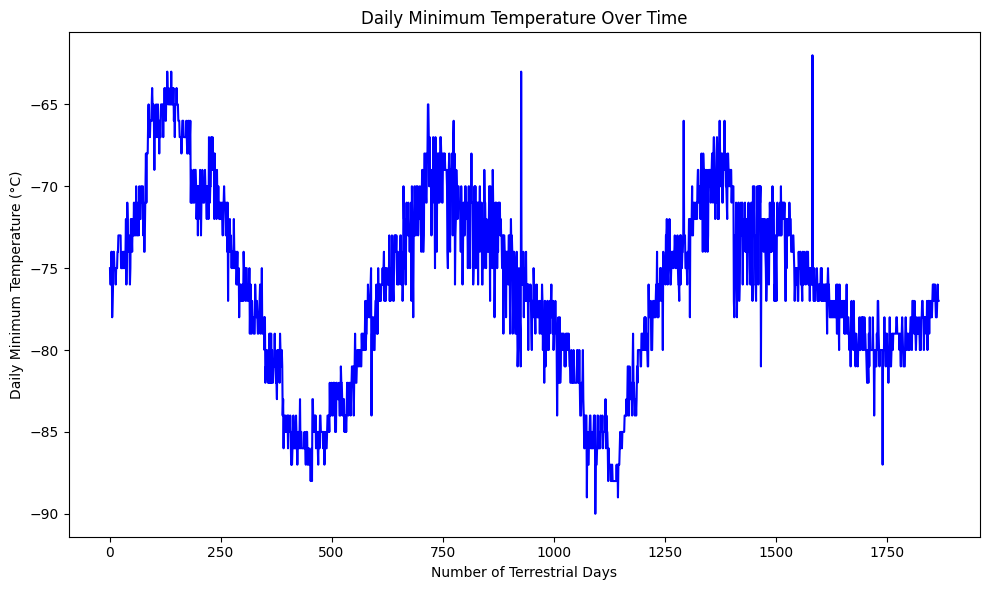

In [108]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df = df.sort_values('terrestrial_date')

# Create the X-axis, numbering according to the date order
df['date_number'] = range(1, len(df) + 1)

# Plot the chart, X-axis as date number, Y-axis as min_temp
plt.figure(figsize=(10, 6))
plt.plot(df['date_number'], df['min_temp'], color='blue')

# Add chart labels and title
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Daily Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature Over Time')

# Display the chart
plt.tight_layout()
plt.show()

In [109]:
# Sorted by min_temp
df_min = df.sort_values('min_temp')
df_min.head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure,date_number
1093,1119,2015-12-09,1188,79,3,-90.0,881.0,1094
1074,1100,2015-11-20,1169,70,3,-89.0,894.0,1075
1144,1168,2016-01-31,1239,102,4,-89.0,818.0,1145
1137,1163,2016-01-23,1232,99,4,-88.0,827.0,1138
1135,1161,2016-01-21,1230,98,4,-88.0,830.0,1136
1128,1155,2016-01-14,1223,94,4,-88.0,839.0,1129
1133,1159,2016-01-19,1228,97,4,-88.0,832.0,1134
1122,1148,2016-01-08,1217,92,4,-88.0,846.0,1123
1129,1154,2016-01-15,1224,95,4,-88.0,837.0,1130
1136,1162,2016-01-22,1231,98,4,-88.0,828.0,1137


### How I choose min_temp and terrestrial_date.
I assume that one Martian year is the time between from one min_temp value to another similar min_temp value.   
    
Mars is far from sun than that of earth. Therefore, Martian year should be greater than 365 days.     
    
Based on the graph "Daily Minimum Temperature Over Time", I choose -88 °C with first time on 2014-02-03  and next is 2016-01-14.   
     
It is great than 365 days with same min_temp.
    
We knew that actual one Martian year is 687 terrestrial (Earth) days. 
    
Based on the 25% visual estimate.   
     
A Martian year will be good within range of approximately 531 to 885 Earth days.

In [110]:
# Calculate the terrestrial (Earth) days in a Martian year
date1 = pd.to_datetime('2014-02-03')
date2 = pd.to_datetime('2016-01-14')

# Calculating the number of days between the two dates
days_between = (date2 - date1).days
print(f"A visual estimate that there are {days_between} terrestrial (Earth) days in a Martian year.")

A visual estimate that there are 710 terrestrial (Earth) days in a Martian year.


### Data Analysis Results

1. There are 12 months on Mars
    
2. The dataset covers 1867 Martian days.
      
3. The coldest month is Month 3 with an average minimum temperature of -83.31°C.   
   The hottest month is Month 8 with an average minimum temperature of -68.38°C.
    
4. The highest pressure month is Month 9 with an average atmospheric pressure of 913.31 PA.   
   The lowest pressure month is Month 6 with an average atmospheric pressure of 745.05 PA.
    
5. A visual estimate that there are 710 terrestrial (Earth) days in a Martian year.   

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [111]:
# Write the data to a CSV
df.to_csv('Mars Weather Data.csv', index=False)

In [112]:
browser.quit()